In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/telco-customer-churn.zip')
d = {'No' : 0, 'Yes' : 1, 'Female' : 0, 'Male' : 1, 'DSL': 1, 'Fiber optic': 2}
for i in ['gender', 'Partner', 'Dependents', 'PhoneService', 'Churn']:
  df[i] = df[i].map(d)
del df['customerID']
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [0]:
df.shape

(7043, 21)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [0]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,1.000000


In [0]:
df.describe(include=['object'])

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,3,3,2,4,6531
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


In [0]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [0]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [0]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [0]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [0]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [0]:
df[df.Churn == 1].mean()

gender             0.497592
SeniorCitizen      0.254682
Partner            0.357945
Dependents         0.174425
tenure            17.979133
PhoneService       0.909042
MonthlyCharges    74.441332
Churn              1.000000
dtype: float64

In [0]:
df[df.Churn == 0].mean()

gender             0.507344
SeniorCitizen      0.128721
Partner            0.528218
Dependents         0.344801
tenure            37.569965
PhoneService       0.901044
MonthlyCharges    61.265124
Churn              0.000000
dtype: float64

From these lists we can make several assumptions:
1. gender does not affect the 'Churn'
2. the share of SeniorCitizen is lower among loyal consumers
3. married clients are more loyal
4. among loyal cunsumers the share of those who have dependents is almost 2 times higher
5. the feature 'tenure' is very different for loyal and disloyal clients
6. we see that disloyal clients spend more on average.
So, it makes sense to study the following features in more detail: SeniorCitizen, Partner, Dependents, tenure, MonthlyCharges

And what about 'InternetService'? Let's calculate the share of disloyal customers among those who use this service and those who do not.


In [0]:
df[df.InternetService == 'DSL']['Churn'].mean()

0.1895910780669145

In [0]:
df[df.InternetService == 'Fiber optic']['Churn'].mean()

0.4189276485788114

In [0]:
df[df.InternetService == 'No']['Churn'].mean()

0.07404980340760157

An interesting result also! It can be assumed that customers who do not use the Internet rarely tend to change their provider. At the same time, the type of Internet connection correlates with the 'Churn'

Let's see how the contract type is related to the churn

In [0]:
pd.crosstab(df.Churn, df.Contract)

Contract,Month-to-month,One year,Two year
Churn,,,
0,2220,1307,1647
1,1655,166,48


We see that the duration of the contract strongly correlates with churn. Add this features to the list for further investigation: SeniorCitizen, Partner, Dependents, tenure, MonthlyCharges, InternetService, Contract

A study of selected features.

Lets look the distribution of some features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f5d1e9828>,
      dtype=object)

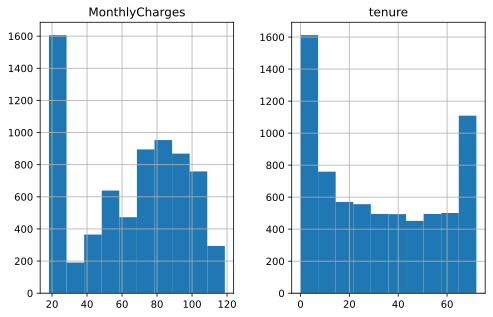

In [0]:
df[['tenure', 'MonthlyCharges']].hist()

'MonthlyCharges' distribution has one peak outside the normal distribution, 'tenure' has two.

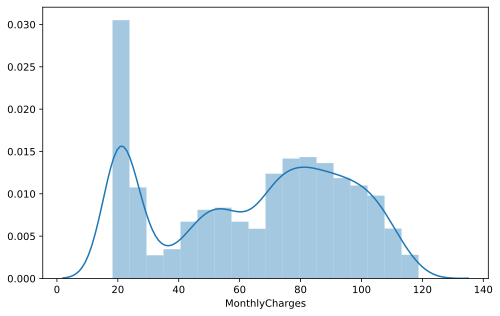

In [0]:
sns.distplot(df.MonthlyCharges)

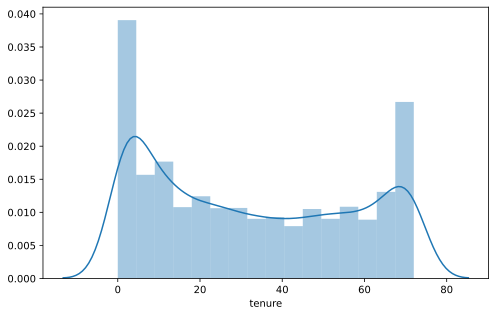

In [0]:
sns.distplot(df.tenure)

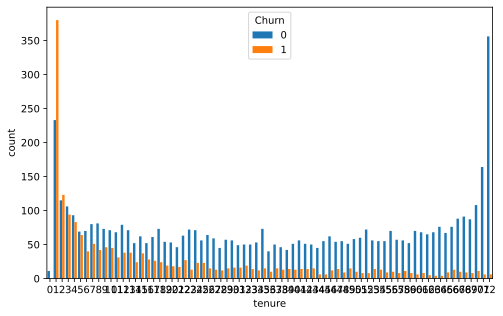

In [0]:
d = df[['tenure', 'Churn']]
sns.countplot(x='tenure', hue='Churn', data=d, saturation=1)

From the last chart we can see that the share of conservative clients increases over time. New clients are at risk zone.

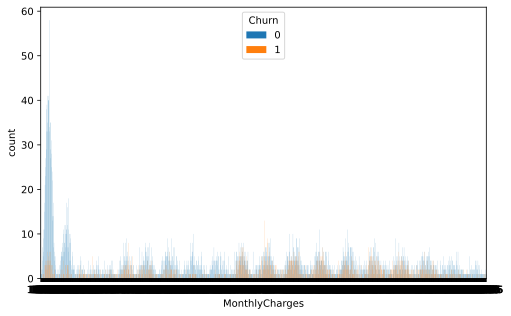

In [0]:
d = df[['MonthlyCharges', 'Churn']]
sns.countplot(x='MonthlyCharges', hue='Churn', data=d, saturation=1)

In [0]:
churn_0 = df[df['Churn'] == 0].groupby('MonthlyCharges')[['Churn']].count()
churn_1 = df[df['Churn'] == 1].groupby('MonthlyCharges')[['Churn']].count()
churn_0.columns = ['Churn']
churn_1.columns = ['Churn']
trace0 = go.Scatter(
    x=churn_0.index,
    y=churn_0.Churn,
    name='churn0'
)
trace1 = go.Scatter(
    x=churn_1.index,
    y=churn_1.Churn,
    name='Churn1'
)
data = [trace0, trace1]
layout = {'title': 'Churn depending on the MonthlyCharges', 'xaxis': {'title': 'MonthlyCharges'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [0]:
SC = df[df['SeniorCitizen'] == 1].groupby(['MonthlyCharges'])[['SeniorCitizen']].count()
noSC = df[df['SeniorCitizen'] == 0].groupby(['MonthlyCharges'])[['SeniorCitizen']].count()
SC.columns = ['SeniorCitizen']
noSC.columns = ['notSeniorCitizen']
trace0 = go.Scatter(
    x=SC.index,
    y=SC.SeniorCitizen,
    name='SeniorCitizen'
)
trace1 = go.Scatter(
    x=noSC.index,
    y=noSC.notSeniorCitizen,
    name='notSeniorCitizen'
)
data = [trace0, trace1]
layout = {'title': 'SeniorCitizens and notSeniorCitizens', 'xaxis': {'title': 'MonthlyCharges'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [0]:
pd.crosstab(df.Churn, df.SeniorCitizen)

SeniorCitizen,0,1
Churn,,
0,4508,666
1,1393,476


let's investigate the correlation of pairs of features:

In [0]:
SC = df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 1)].groupby(['MonthlyCharges'])[['SeniorCitizen']].count()
noSC = df[(df['SeniorCitizen'] == 0) & (df['Churn'] == 1)].groupby(['MonthlyCharges'])[['SeniorCitizen']].count()
SC.columns = ['SeniorCitizen']
noSC.columns = ['notSeniorCitizen']
trace0 = go.Scatter(
    x=SC.index,
    y=SC.SeniorCitizen,
    name='SeniorCitizen'
)
trace1 = go.Scatter(
    x=noSC.index,
    y=noSC.notSeniorCitizen,
    name='notSeniorCitizen'
)
data = [trace0, trace1]
layout = {'title': 'Disloyal SeniorCitizens and notSeniorCitizens', 'xaxis': {'title': 'MonthlyCharges'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

create a new feature 'internet' that shows whether the client use the Internet or not, regardless of the connection type

In [0]:
df['internet'] = df['InternetService']
d = {'DSL': 1, 'Fiber optic': 1, 'No': 0}
df['internet'] = df['internet'].map(d)
SC = df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 1)].groupby('internet')[['Churn']].count()
nSC = df[(df['SeniorCitizen'] == 0) & (df['Churn'] == 1)].groupby('internet')[['Churn']].count()
SC.columns = ['Churn']
nSC.columns = ['Churn']
trace0 = go.Bar(
    x = SC.index,
    y = SC.Churn,
    name = 'Churn of Senior Citizens'
)
trace1 = go.Bar(
    x = nSC.index,
    y = nSC.Churn,
    name = 'Churn of not Senior Citizens'
)
data = [trace0, trace1]
layout = {'title': 'Churn of SeniorCitizens-internet-users and not SeniorCitizens-internet-users'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

From this graph we see that among internet users who is Senior Citizens share of disloyal clients is mach higher.

For comparison, let's look at the share of pensioners among loyal Internet users.

In [0]:
SC = df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 0)].groupby('internet')[['Churn']].count()
nSC = df[(df['SeniorCitizen'] == 0) & (df['Churn'] == 0)].groupby('internet')[['Churn']].count()
SC.columns = ['Churn']
nSC.columns = ['Churn']
trace0 = go.Bar(
    x = SC.index,
    y = SC.Churn,
    name = 'Loyal Senior Citizens'
)
trace1 = go.Bar(
    x = nSC.index,
    y = nSC.Churn,
    name = 'Loyal not Senior Citizens'
)
data = [trace0, trace1]
layout = {'title': 'Loyal SeniorCitizens-internet-users and not SeniorCitizens-internet-users'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

It is noticeably lower.

In [0]:
lSC = df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 0) & (df['internet'] == 1)].groupby('TechSupport')[['Churn']].count()
dlSC = df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 1) & (df['internet'] == 1)].groupby('TechSupport')[['Churn']].count()
lSC.columns = ['Churn']
dlSC.columns = ['Churn']
trace0 = go.Bar(
    x = lSC.index,
    y = lSC.Churn,
    name = 'Loyal SC-int-users'
)
trace1 = go.Bar(
    x = dlSC.index,
    y = dlSC.Churn,
    name = 'Disloyal SC-int-users'
)
data = [trace0, trace1]
layout = {'title': 'Loyal and disloyal Senior Citizens who are internet users depending on the availability of techsupport'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

We see that SeniorCitizen-users without technical support change their provider in half of the cases. We can assume that technical problems with the Internet, which they can not solve without technical support, are a very annoying factor for them.

let's look at a similar distribution among nonpensioners:

In [0]:
lnSC = df[(df['SeniorCitizen'] == 0) & (df['Churn'] == 0) & (df['internet'] == 1)].groupby('TechSupport')[['Churn']].count()
dlnSC = df[(df['SeniorCitizen'] == 0) & (df['Churn'] == 1) & (df['internet'] == 1)].groupby('TechSupport')[['Churn']].count()
lnSC.columns = ['Churn']
dlnSC.columns = ['Churn']
trace0 = go.Bar(
    x = lnSC.index,
    y = lnSC.Churn,
    name = 'Loyal notSC-int-users'
)
trace1 = go.Bar(
    x = dlnSC.index,
    y = dlnSC.Churn,
    name = 'Disloyal notSC-int-users'
)
data = [trace0, trace1]
layout = {'title': 'Loyal and disloyal not Senior Citizens who are internet users (depending on the availability of techsupport)'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

The share of disloyal clients, among those who did not use techsupport, is vary high too, but noticely lower.

Hypothesis: high probability of churn for customers without technical support. This effect is even more pronounced for Senior Citizens.